In [1]:
import numpy as np

데이터 타입

1. 연속형
2. 범주형
3. 텍스트

텍스트 데이터는 주로 글자가 연결된 문자열로 표현된다. 텍스트 데이터의 길이는 서로 같은 경우가 없다. 이런 특성은 수치형 특성과 매우 다르므로 머신러닝 알고리즘 적용 전에 전처리 해야 한다.

# 7.1 문자열 데이터 타입

- 문자열 데이터 타입


1. 범주형 데이터
2. 범주에 의미를 연결시킬 수 있는 임의의 문자열
3. 구조화된 문자열 데이터
4. 텍스트 데이터

- 텍스트 분석에서는 데이터셋을 말뭉치(corpus)라고 하고, 하나의 텍스트를 의미하는 각 데이터 포인트를 문서(document)라 한다. 이런 용어는 텍스트 데이터를 주로 다루는 정보 검색(IR)과 자연어 처리(NLP) 공동체에서 유래했다.

# 7.2 영화 리뷰 감성 분석

In [3]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")

# 텍스트와 레이블을 포함하는 Bunch 객체를 반환
text_train, y_train = reviews_train.data, reviews_train.target

In [4]:
print("text_train 타입: {}".format(type(text_train)))
print("text_train 길이: {}".format(len(text_train)))
print("text_train[6]: \n{}".format(text_train[6]))

text_train 타입: <class 'list'>
text_train 길이: 25000
text_train[6]: 
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [5]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [6]:
print("text_train 타입: {}".format(type(text_train)))
print("text_train 길이: {}".format(len(text_train)))
print("text_train[6]: \n{}".format(text_train[6]))

text_train 타입: <class 'list'>
text_train 길이: 25000
text_train[6]: 
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.  Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life.   I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [7]:
print("클래스별 샘플 수 (훈련 데이터): {}".format(np.bincount(y_train)))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [8]:
reviews_test = load_files('data/aclImdb/test/')
text_test, y_test = reviews_test.data, reviews_test.target

In [9]:
print("테스트 데이터 문서 수: {}".format(len(text_test)))
print("클래스 별 샘플 수 (테스트 데이터): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br / >", b" ") for doc in text_test]

테스트 데이터 문서 수: 25000
클래스 별 샘플 수 (테스트 데이터): [12500 12500]


# 7.3 텍스트 데이터를 BOW로 표현하기

- 머신러닝에서 텍스트를 표현하는 방법 중 BOW는 가장 간단하지만 효과적이면서 널리 쓰이는 방법이다. 이 방법을 쓰면 장, 문단, 문장, 서식 같은 입력 텍스트 구조 대부분을 잃고, 각 단어가 이 말뭉치에 있는 텍스트에 얼마나 많이 나타나는지만 헤아린다. 구조와 상관없이 단어의 출현 횟수만 세기 떄문에 텍스트를 담는 가방으로 생각할 수 있다.

1. 토큰화: 각 문서를 문서에 포함된 단어로 나눈다.
2. 어휘 사전 구축: 모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매긴다.
3. 인코딩: 어휘 사전의 단어가 문서마다 몇 번이나 나타나는지 헤어린다.

## 1. 샘플

In [10]:
bard_words = ['The fool doth think he is wise',
              "but the wise man knows himself to be a fool"]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(bard_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
print("어휘 사전 크기: {}".format(len(vect.vocabulary_)))
print("어휘 사전 내용: {}".format(vect.vocabulary_))

어휘 사전 크기: 13
어휘 사전 내용: {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [13]:
bag_of_words = vect.transform(bard_words)
print("BOW: {}".format(repr(bag_of_words)))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


- 대부분의 문서는 어휘 사전에 있는 단어 중 일부만 포함하므로, 즉 특성 배열의 대부분 원소가 0이라서 희소 행렬을 사용한다. 전체 영어 단어 수에 비해 영화 리뷰에 얼마나 많은 단어가 나타날지 생각해보면 더 이해하기 쉽다. 값이 0인 원소를 저장하는 것은 메모리 낭비

In [14]:
print("BOW: \n{}".format(bag_of_words.toarray()))

BOW: 
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


## 2. 영화 리뷰에 대한 BOW

In [15]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


- 총 74,489 차원

In [16]:
feature_names = vect.get_feature_names()
print("특성 개수: {}".format(len(feature_names)))
print("처음 20개 특성: \n{}".format(feature_names[:20]))
print("20,010에서 20,030까지 특성: \n".format(feature_names[20010:20030]))
print("매 2,000번쨰 특성: \n{}".format(feature_names[::2000]))

특성 개수: 74849
처음 20개 특성: 
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20,010에서 20,030까지 특성: 

매 2,000번쨰 특성: 
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [17]:
[text_train[i] for i in np.argwhere(X_train[:, 9] == 1)[:, 0]]

[b'"Dutch Schultz", AKA Arthur Fleggenheimer, was a real person and his rather nasty life is fairly well documented. This movie which purports to depict his life should have used a fictional character, because the overdramatized events are too strong a departure from the facts and the chronology. Not only that, it ignores some interesting details which other versions have included such as the public relations fiasco in upstate N.Y. and his religious conversion. It is true that he was executed by Luciano, Lansky, et. al. but that\'s as far as it goes. The exploding plate scene which represents Luciano carrying out the execution of Bo Weinberg in his own home, assisted by his own mother is rediculous. Also, there is the scene in which Dutch approaches his own mother to pay protection to Legs Diamond. It just doesn\'t work. The character of Mrs. Fleggenheimer doesn\'t work either. This movie does not need a doting Jewish mother for comic relief. The lame representation of Legs Diamond was

In [31]:
y_train[:5]

array([1, 0, 1, 0, 0])

### 교차 검증

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("교차 검증 평균 점수: {:.2f}".format(np.mean(scores)))

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


교차 검증 평균 점수: 0.88


### GridSearch

In [19]:
from tqdm import tqdm, tnrange, tqdm_notebook
from time import sleep

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=10)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ C=0.001, score=0.8416, total=   0.8s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ............................ C=0.001, score=0.8446, total=   0.7s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ............................ C=0.001, score=0.8484, total=   0.7s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV] ............................ C=0.001, score=0.8466, total=   0.7s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV] ............................. C=0.001, score=0.848, total=   0.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s remaining:    0.0s


[CV] ............................. C=0.01, score=0.8824, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s remaining:    0.0s


[CV] .............................. C=0.01, score=0.882, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.4s remaining:    0.0s


[CV] .............................. C=0.01, score=0.882, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.8s remaining:    0.0s


[CV] ............................. C=0.01, score=0.8824, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.1s remaining:    0.0s


[CV] ............................. C=0.01, score=0.8796, total=   1.3s
[CV] C=0.1 ...........................................................
[CV] .............................. C=0.1, score=0.8888, total=   2.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.885, total=   2.5s
[CV] C=0.1 ...........................................................
[CV] .............................. C=0.1, score=0.8894, total=   2.6s
[CV] C=0.1 ...........................................................
[CV] .............................. C=0.1, score=0.8948, total=   2.6s
[CV] C=0.1 ...........................................................
[CV] .............................. C=0.1, score=0.8828, total=   2.9s
[CV] C=1 .............................................................
[CV] ................................ C=1, score=0.8824, total=   6.7s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [20]:
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적 매개변수: ", grid.best_params_)

최상의 교차 검증 점수: 0.89
최적 매개변수:  {'C': 0.1}


In [21]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.88


### 단어 추출 방법 개선: 5개 이상의 문서에서 토큰 추출

In [22]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df 로 제한한 X_train: {}".format(repr(X_train)))

min_df 로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [23]:
feature_names = vect.get_feature_names()

print("특성 개수: {}".format(len(feature_names)))
print("처음 50개 특성:\n{}".format(feature_names[:50]))
print("20,010개부터 20,030까지 특성:\n{}".format(feature_names[20010:20030]))
print("매 700번째 특성:\n{}".format(feature_names[::700]))

특성 개수: 27271
처음 50개 특성:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
20,010개부터 20,030까지 특성:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
매 700번째 특성:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', '

- 특성 개수가 감소했다.

In [24]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=5, n_jobs=4)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   35.6s finished
/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차 검증 점수: 0.89


# 7.4 Stopword

In [25]:
# 1. Stopword
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수: {}".format(len(ENGLISH_STOP_WORDS)))
print("매 10번째 불용어: \n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

# stopword 제거
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files

### Data
reviews_train = load_files("data/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target

# stopword 제거
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train: \n{}".format(repr(X_train)))

불용어 개수: 318
매 10번째 불용어: 
['very', 'formerly', 'another', 'these', 'from', 'nowhere', 'when', 'ie', 'whatever', 'if', 'than', 'how', 'done', 'others', 'interest', 'eleven', 'or', 'what', 'one', 'hereby', 'yourself', 'give', 'system', 'also', 'since', 'often', 'for', 'a', 'towards', 'i', 'seemed', 'therefore']
불용어가 제거된 X_train: 
<25000x26967 sparse matrix of type '<class 'numpy.int64'>'
	with 2164624 stored elements in Compressed Sparse Row format>


In [27]:
# 2. Grid Search
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=5, n_jobs=4)
grid.fit(X_train, y_train)
print("최상의 교차 검증: {:.2f}".format(grid.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   13.3s finished
/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차 검증: 0.88


- 27,000개가 넘는 특성에서 305개를 제외했다고 성능이나 모델 해거석이 나아진 것 같지는 않다. 
- CountVectorizer의 max_df 옵션을 지정하여 자주 나타나는 단어를 제거하고 특성의 개수와 성능에 어떻게 영향을 주는지 연습한다.

# 7.5 tf-idf로 데이터 스케일 변경하기

In [30]:
%%latex

$$tfidf(w, d) = tf(log((N+1) / (N_w + 1)) + 1)$$

<IPython.core.display.Latex object>

- scikit-learn에는 tf-idf 계산 후에 scaling으로 각 문서 벡터의 길이가 1이 되도록 스케일을 바꾼다.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

In [33]:
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=4)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차 검증 점수: 0.89


In [34]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']

# 훈련 데이터 셋 반환
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

In [35]:
feature_names = np.array(vectorizer.get_feature_names())

In [37]:
print("tfidf가 가장 낮은 특성: \n{}".format(
    feature_names[sorted_by_tfidf[:20]])
)

tfidf가 가장 낮은 특성: 
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'galadriel' 'songwriting'
 'cataclysmic' 'sylvain' 'emerald' 'mclaughlin' 'oversee' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'booed' 'reverting'
 'spacious']


In [42]:
print("tfidf가 가장 높은 특성: \n{}".format(
    feature_names[sorted_by_tfidf[-20:]])
)

tfidf가 가장 높은 특성: 
['muppet' 'brendan' 'zatoichi' 'dev' 'demons' 'lennon' 'bye' 'weller'
 'woo' 'sasquatch' 'botched' 'xica' 'darkman' 'casper' 'doodlebops'
 'steve' 'smallville' 'wei' 'scanners' 'pokemon']


- idf가 낮은 단어, 가장 자주 나타나서 덜 중요하다고 생각하는 단어를 확인해보겠습니다.

In [44]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("idf가 가장 낮은 특성: \n{}".format(
    feature_names[sorted_by_idf[:100]])
)

idf가 가장 낮은 특성: 
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'br' 'have' 'one' 'be' 'film' 'are' 'you'
 'all' 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his'
 'out' 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more'
 'when' 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really'
 'story' 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were'
 'other' 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how'
 'great' 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after'
 'any' 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen'
 'its']


# 7-6. 모델 계수 조사

In [45]:
import mglearn

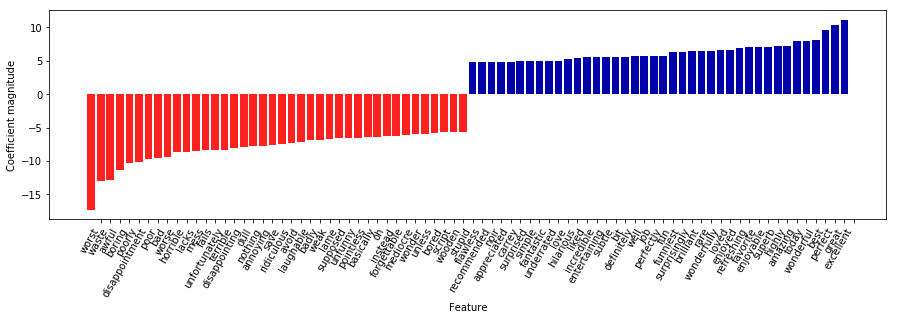

In [46]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps['logisticregression'].coef_[0],
feature_names, n_top_features=40)

# 7-7. 여러 단어로 만든 BOW(n-그램)

In [55]:
from matplotlib import pyplot as plt

- ngram: 연속된 토큰이다.

CountVectorizer와 TfidfVectorizer는 ngram_range 매개변수에 특성으로 고려할 토큰 범위를 지정할 수 있다.

In [47]:
print("bards_words: \n{}".format(bard_words))

bards_words: 
['The fool doth think he is wise', 'but the wise man knows himself to be a fool']


In [48]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bard_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전: \n{}".format(cv.get_feature_names()))

어휘 사전 크기: 14
어휘 사전: 
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [49]:
print("변환된 데이터(밀집 배열): \n{}".format(cv.transform(bard_words).toarray()))

변환된 데이터(밀집 배열): 
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [50]:
cv = CountVectorizer(ngram_range=(1,3)).fit(bard_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전: \n{}".format(cv.get_feature_names()))

어휘 사전 크기: 39
어휘 사전: 
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [51]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)]}
grid = GridSearchCV(pipe, param_grid, cv=5, verbose=5, n_jobs=4)
grid.fit(text_train, y_train)
print("최상의 교차 검증: {:.2f}".format(grid.best_score_))
print("최적 매개 변수: \n{}".format(grid.best_params_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  8.2min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 12.8min finished
/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차 검증: 0.91
최적 매개 변수: 
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


- 결과에서 듯이 바이그램과 트라이그램을 추가해서 1%이상 성능을 높였다.

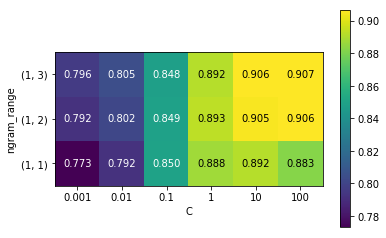

In [59]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T

#heatmap
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

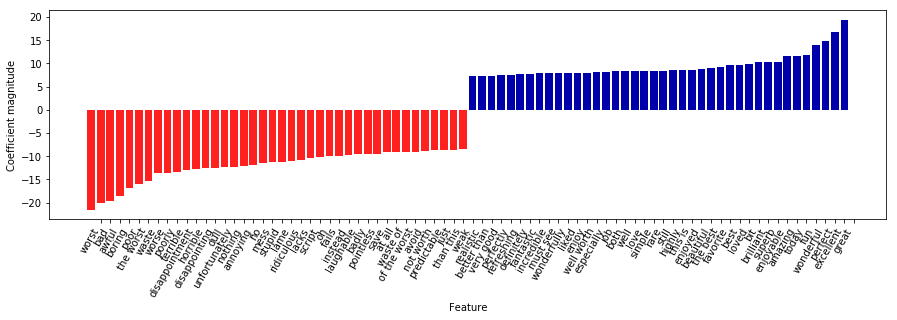

In [60]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)